In [4]:
import pandas as pd
import numpy as np
import random
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
# Create a list of sample data for each feature
n = 2500  # Number of users
age = [random.randint(18, 65) for _ in range(n)]
gender = [random.choice(['Male', 'Female', 'Other']) for _ in range(n)]
location = [random.choice(['Urban', 'Suburban', 'Rural']) for _ in range(n)]
marital_status = [random.choice(['Single', 'Married', 'Divorced']) for _ in range(n)]
employment = [random.choice(['Employed', 'Unemployed', 'Self-Employed']) for _ in range(n)]
account_creation_date = pd.date_range(start='2019-01-01', end='2022-01-01', freq='M').to_list()
account_creation_date = [random.choice(account_creation_date) for _ in range(n)]
savings_amount = [random.uniform(1000.0, 100000.0) for _ in range(n)]
avg_transaction_value = [random.uniform(100.0, 10000.0) for _ in range(n)]
transaction_count_last_30_days = [random.randint(0, 30) for _ in range(n)]
avg_transaction_per_month = [random.uniform(0, 100) for _ in range(n)]
avg_transaction_amount = [random.uniform(50, 5000) for _ in range(n)]
device_type = [random.choice(['Mobile', 'Desktop', 'Tablet']) for _ in range(n)]
app_usage_time = [random.randint(0, 300) for _ in range(n)]  # in minutes
app_usage_duration = [random.randint(1, 365) for _ in range(n)]  # in days
browser = [random.choice(['Chrome', 'Firefox', 'Safari', 'Edge']) for _ in range(n)]
chatbot_usage = [random.choice([0, 1]) for _ in range(n)]
active_users = [random.randint(100, 1000) for _ in range(n)]
daily_new_users = [random.randint(0, 10) for _ in range(n)]
average_session_length = [random.uniform(0.5, 3.0) for _ in range(n)]  # in hours
monthly_revenue = [random.uniform(1000.0, 100000.0) for _ in range(n)]
fraud_label = [random.choice([0, 1]) for _ in range(n)]

# Create the DataFrame
df = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'Location': location,
    'Marital_Status': marital_status,
    'Employment': employment,
    'AccountCreationDate': account_creation_date,
    'SavingsAmount': savings_amount,
    'AvgTransactionValue': avg_transaction_value,
    'TransactionCountLast30Days': transaction_count_last_30_days,
    'AvgTransactionPerMonth': avg_transaction_per_month,
    'AvgTransactionAmount': avg_transaction_amount,
    'DeviceType': device_type,
    'AppUsageTime': app_usage_time,
    'AppUsageDuration': app_usage_duration,
    'Browser': browser,
    'ChatbotUsage': chatbot_usage,
    'ActiveUsers': active_users,
    'DailyNewUsers': daily_new_users,
    'AverageSessionLength': average_session_length,
    'MonthlyRevenue': monthly_revenue,
    'IsFraud': fraud_label
})

df.head(2).T

,0,1
Age,21,49
Gender,Other,Other
Location,Urban,Suburban
Marital_Status,Single,Divorced
Employment,Employed,Unemployed
AccountCreationDate,2021-04-30 00:00:00,2019-04-30 00:00:00
SavingsAmount,23100.591667,32567.206958
AvgTransactionValue,4901.332204,2865.813838
TransactionCountLast30Days,1,20
AvgTransactionPerMonth,19.979608,32.426837


# EDA for features

In [10]:
# Using pandas
print(df['Age'].describe())


count    2500.000000
mean       41.683600
std        13.942785
min        18.000000
25%        30.000000
50%        42.000000
75%        54.000000
max        65.000000
Name: Age, dtype: float64


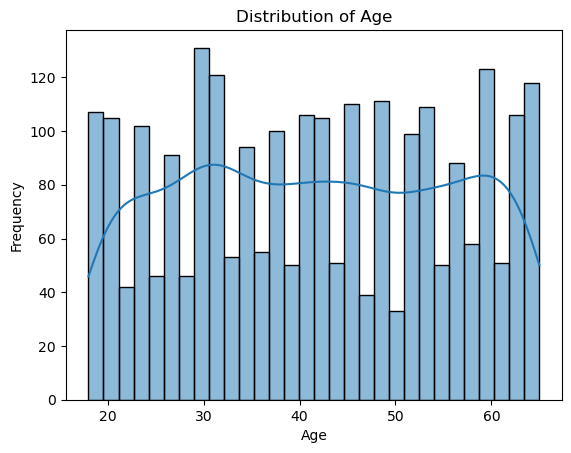

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


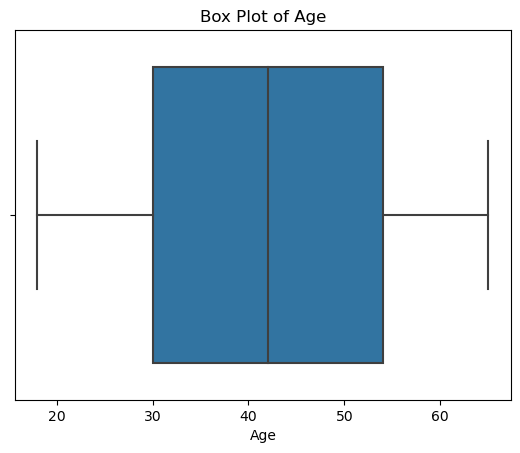

In [12]:
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()


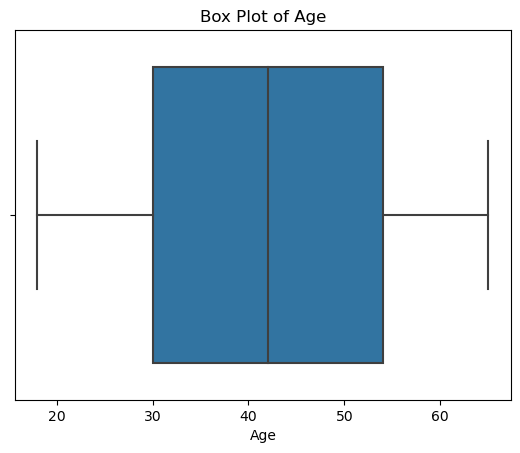

In [13]:
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()


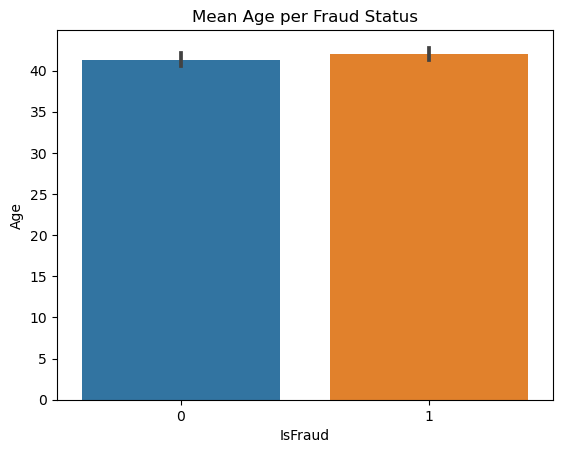

In [14]:
# Using a bar plot for the mean age for each class of 'IsFraud'
sns.barplot(x='IsFraud', y='Age', data=df)
plt.title('Mean Age per Fraud Status')
plt.show()


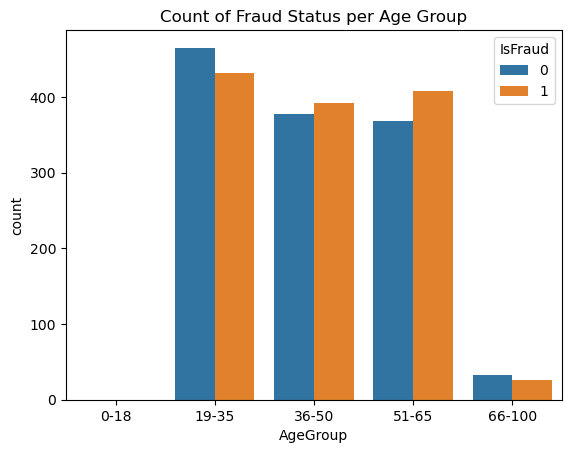

In [15]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

sns.countplot(x='AgeGroup', hue='IsFraud', data=df)
plt.title('Count of Fraud Status per Age Group')
plt.show()


# EDA for ALL Numerical Features

Feature: Age
count    2500.000000
mean       41.683600
std        13.942785
min        18.000000
25%        30.000000
50%        42.000000
75%        54.000000
max        65.000000
Name: Age, dtype: float64


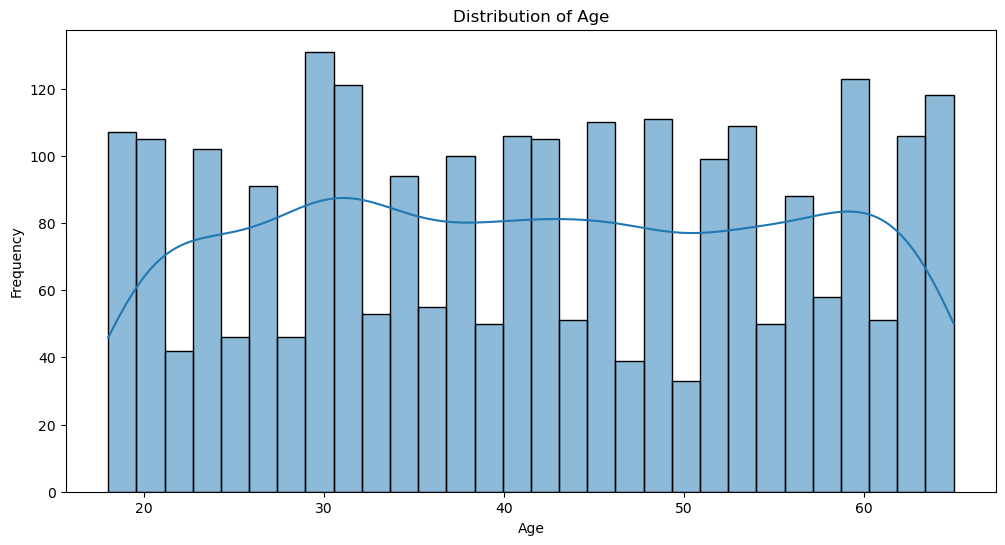

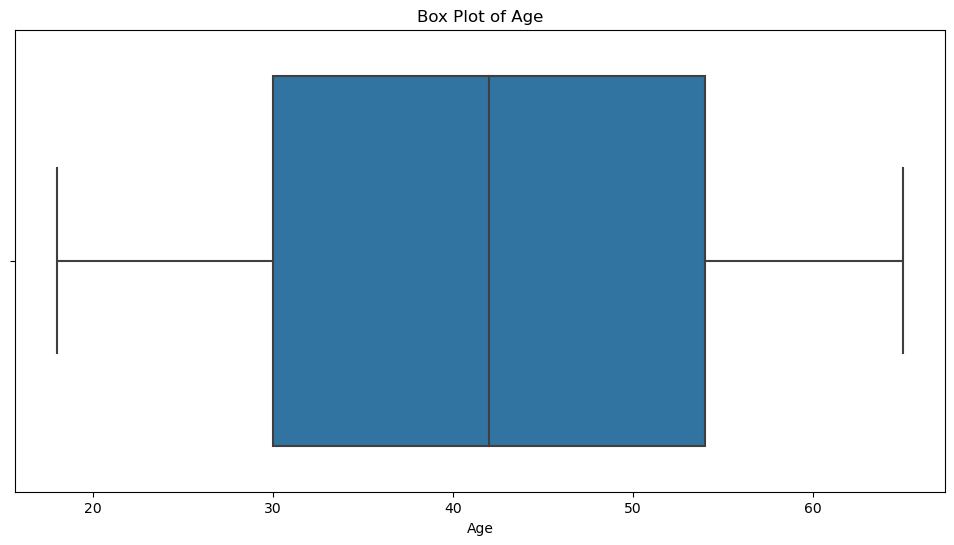

Outliers for Age using Z-score method: []
Outliers for Age using IQR method: []
------------------------------------------------
Feature: SavingsAmount
count     2500.000000
mean     50817.497462
std      28580.808482
min       1040.630816
25%      25524.966633
50%      50357.266379
75%      76130.457671
max      99996.871606
Name: SavingsAmount, dtype: float64


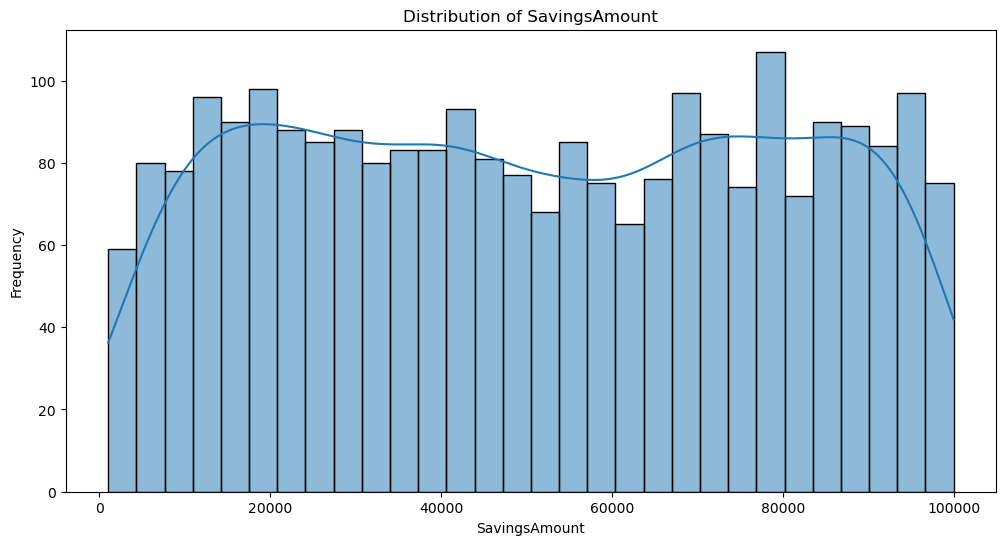

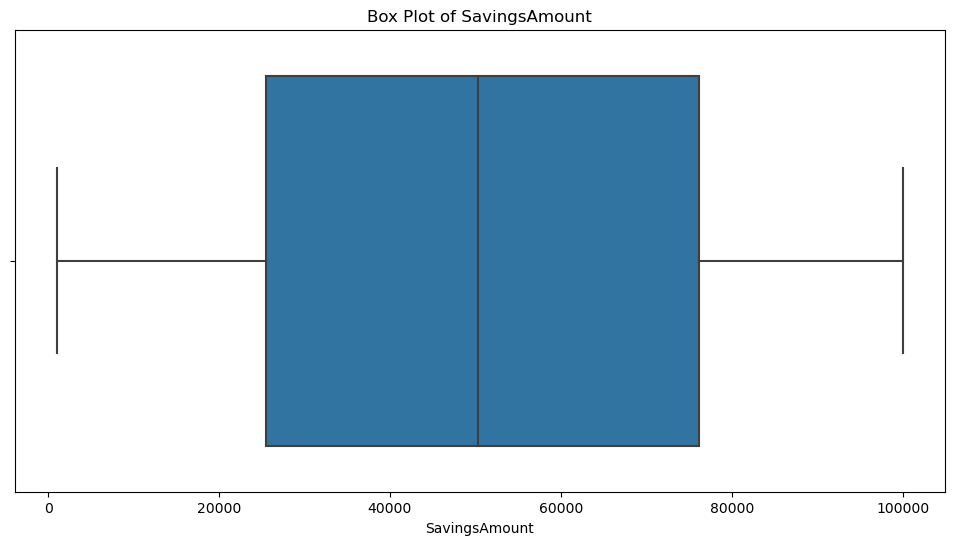

Outliers for SavingsAmount using Z-score method: []
Outliers for SavingsAmount using IQR method: []
------------------------------------------------
Feature: AvgTransactionValue
count    2500.000000
mean     5048.927939
std      2867.472560
min       101.658460
25%      2537.054970
50%      5073.325424
75%      7607.652690
max      9994.734415
Name: AvgTransactionValue, dtype: float64


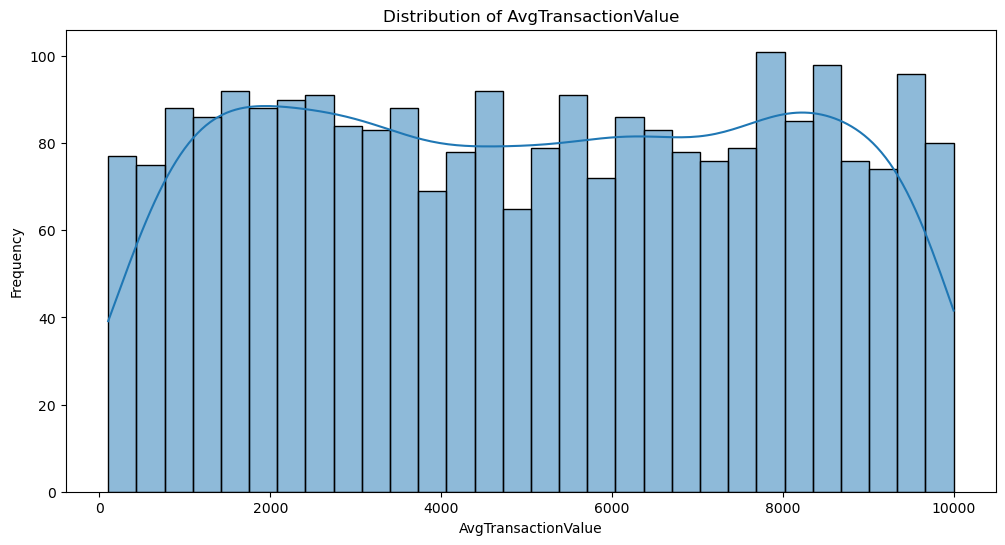

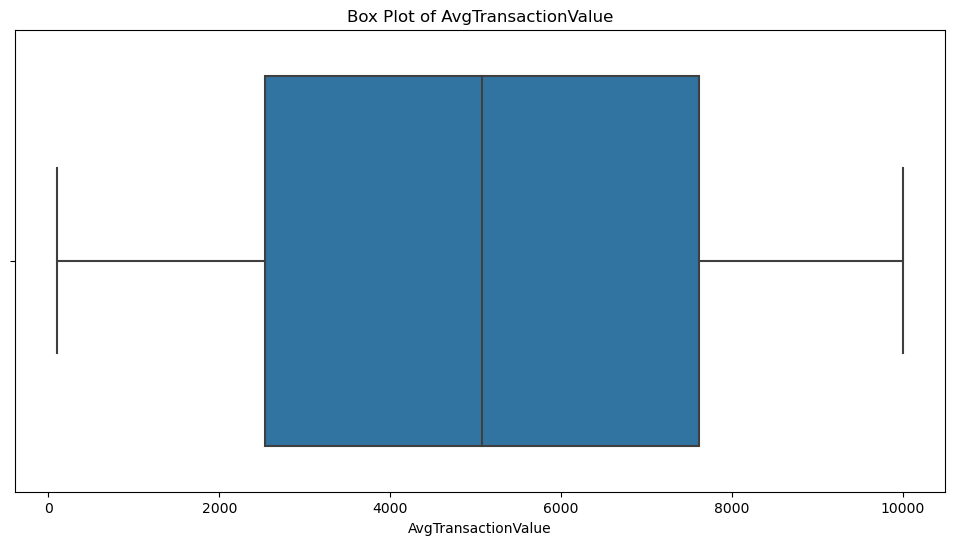

Outliers for AvgTransactionValue using Z-score method: []
Outliers for AvgTransactionValue using IQR method: []
------------------------------------------------
Feature: TransactionCountLast30Days
count    2500.000000
mean       15.019600
std         9.095642
min         0.000000
25%         7.000000
50%        15.000000
75%        23.000000
max        30.000000
Name: TransactionCountLast30Days, dtype: float64


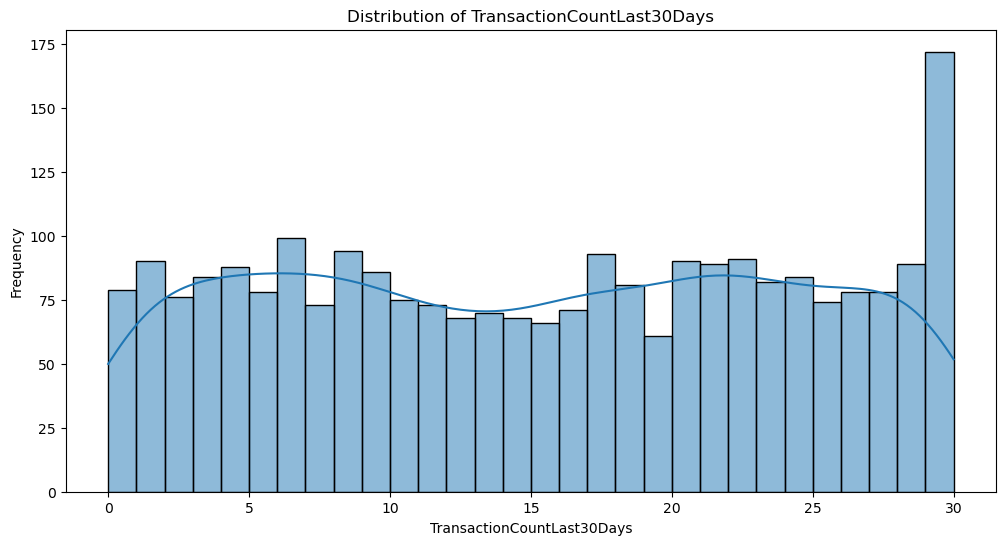

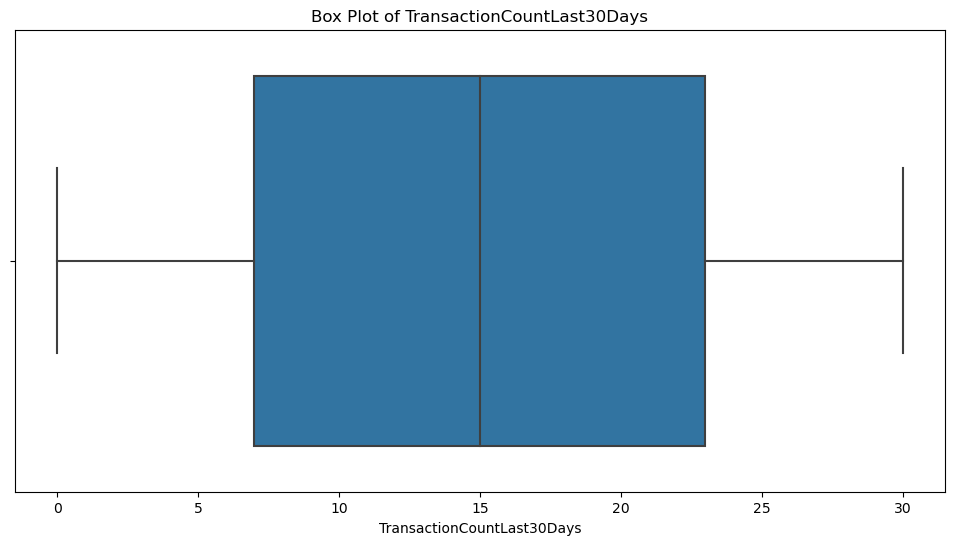

Outliers for TransactionCountLast30Days using Z-score method: []
Outliers for TransactionCountLast30Days using IQR method: []
------------------------------------------------
Feature: AvgTransactionPerMonth
count    2500.000000
mean       49.848743
std        28.912917
min         0.005294
25%        24.658590
50%        49.145886
75%        74.994853
max        99.928378
Name: AvgTransactionPerMonth, dtype: float64


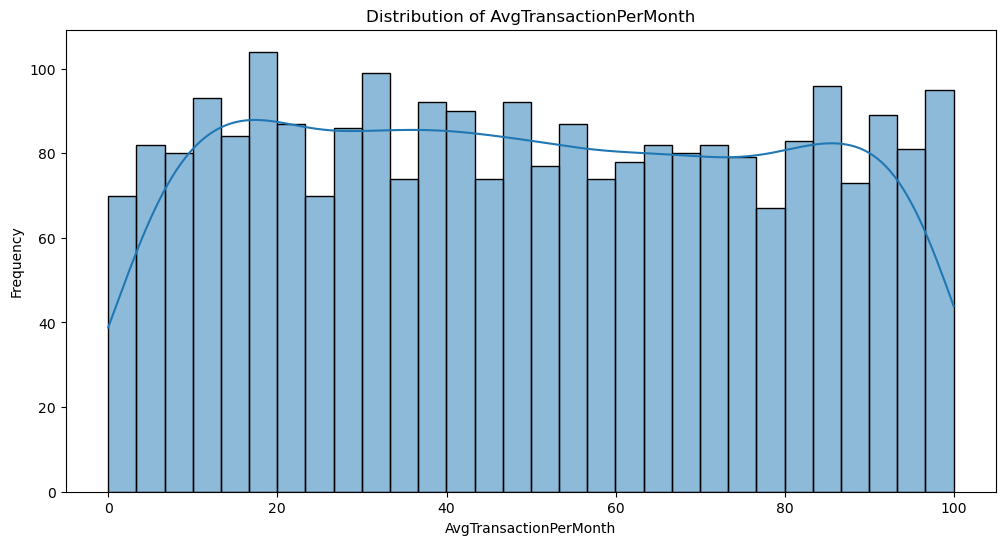

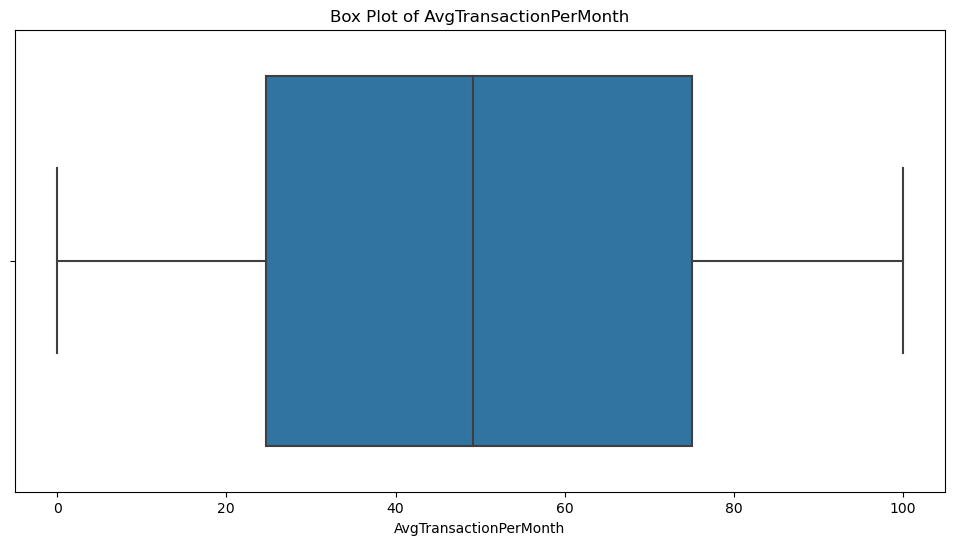

Outliers for AvgTransactionPerMonth using Z-score method: []
Outliers for AvgTransactionPerMonth using IQR method: []
------------------------------------------------
Feature: AvgTransactionAmount
count    2500.000000
mean     2542.041809
std      1452.032842
min        50.182451
25%      1282.628583
50%      2584.286225
75%      3826.363712
max      4999.859324
Name: AvgTransactionAmount, dtype: float64


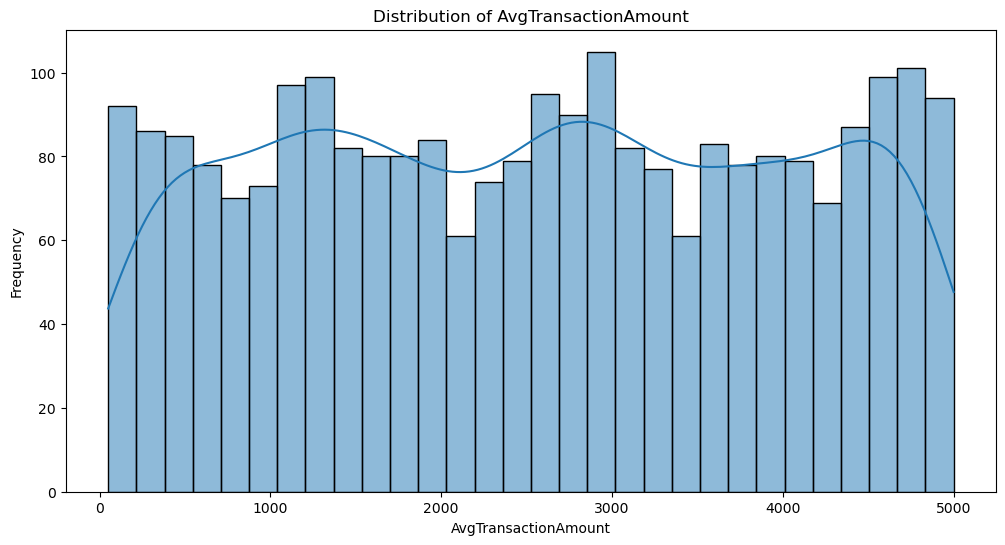

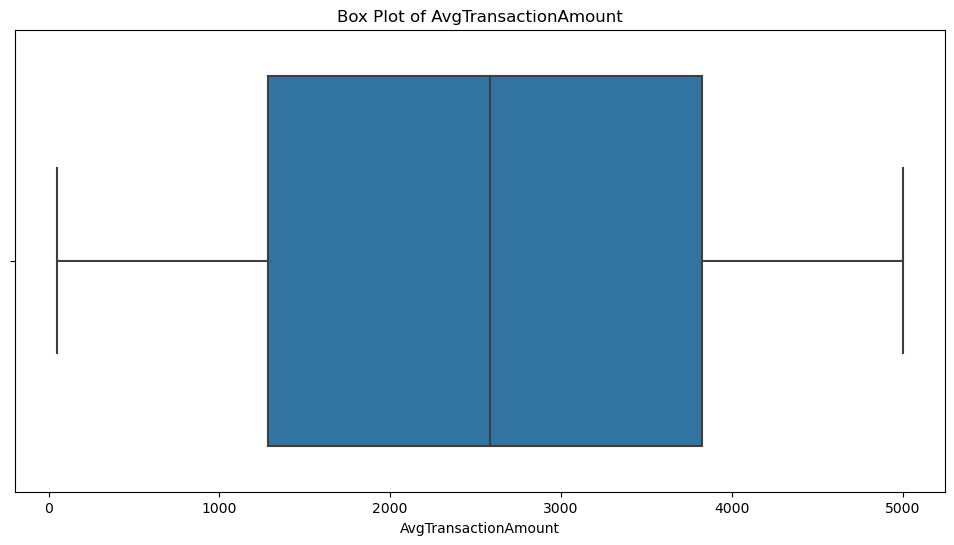

Outliers for AvgTransactionAmount using Z-score method: []
Outliers for AvgTransactionAmount using IQR method: []
------------------------------------------------
Feature: AppUsageTime
count    2500.00000
mean      148.09320
std        86.71226
min         0.00000
25%        73.00000
50%       147.00000
75%       223.00000
max       300.00000
Name: AppUsageTime, dtype: float64


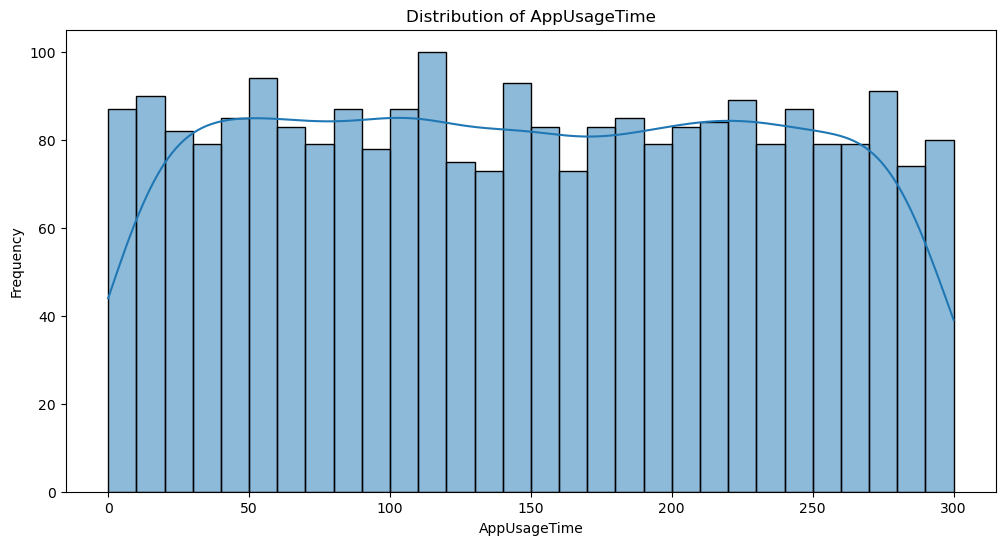

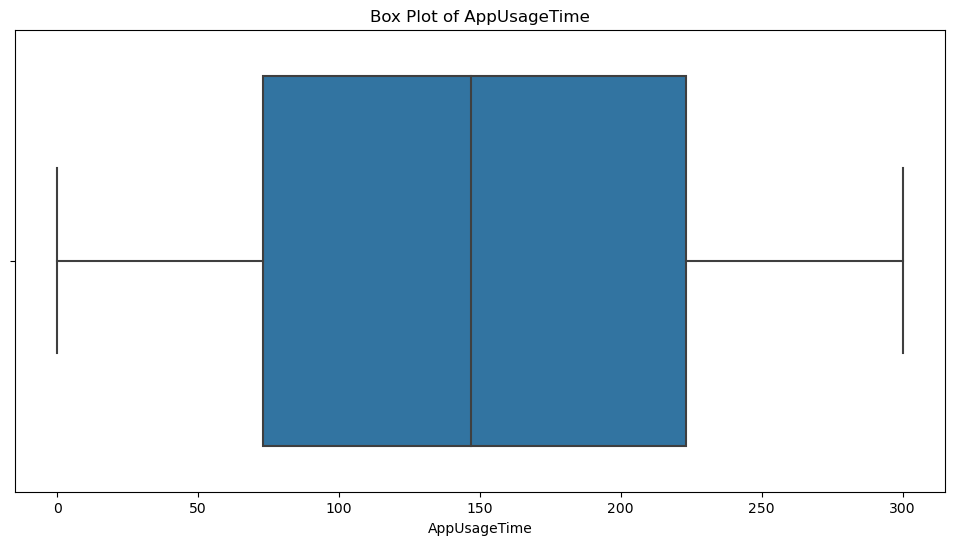

Outliers for AppUsageTime using Z-score method: []
Outliers for AppUsageTime using IQR method: []
------------------------------------------------
Feature: AppUsageDuration
count    2500.000000
mean      183.750800
std       104.104477
min         1.000000
25%        95.000000
50%       186.000000
75%       270.250000
max       365.000000
Name: AppUsageDuration, dtype: float64


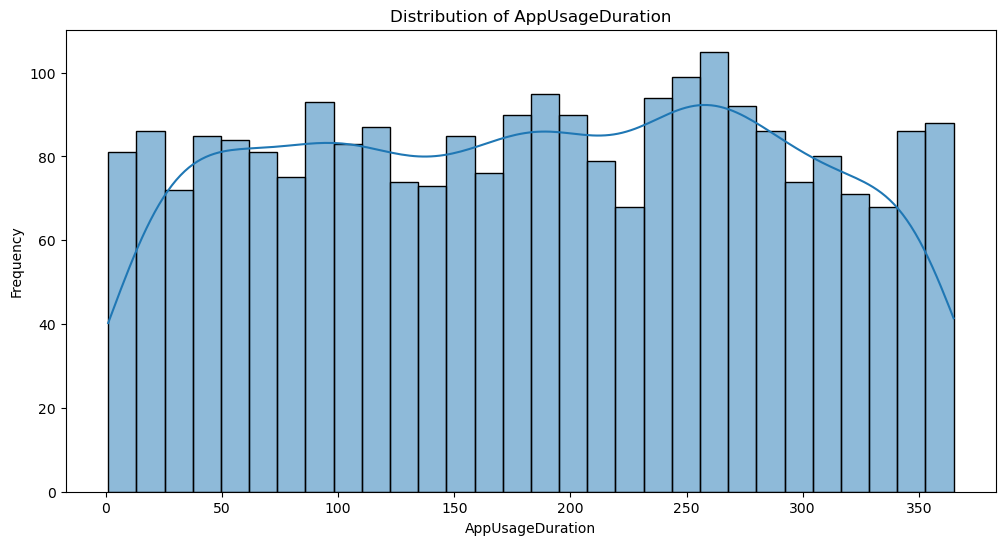

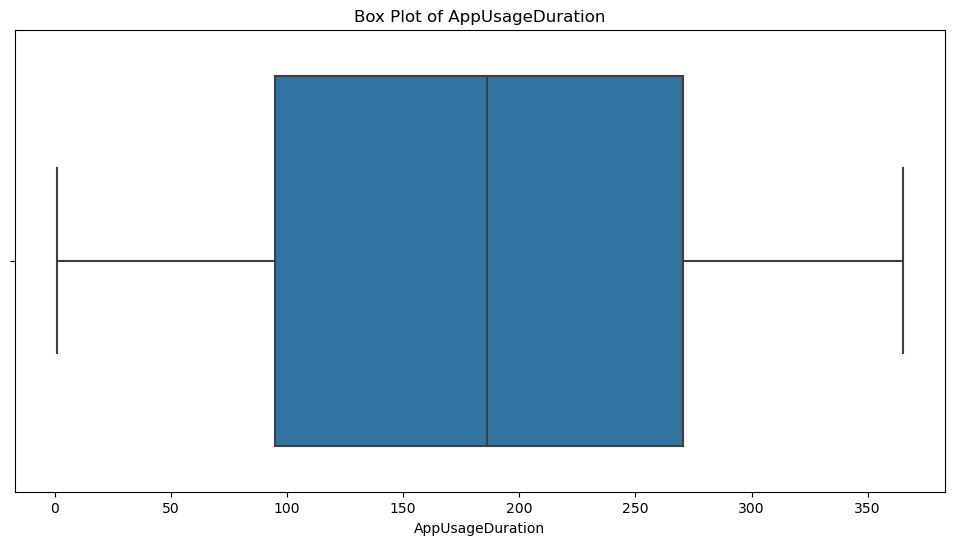

Outliers for AppUsageDuration using Z-score method: []
Outliers for AppUsageDuration using IQR method: []
------------------------------------------------
Feature: ChatbotUsage
count    2500.00
mean        0.51
std         0.50
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         1.00
Name: ChatbotUsage, dtype: float64


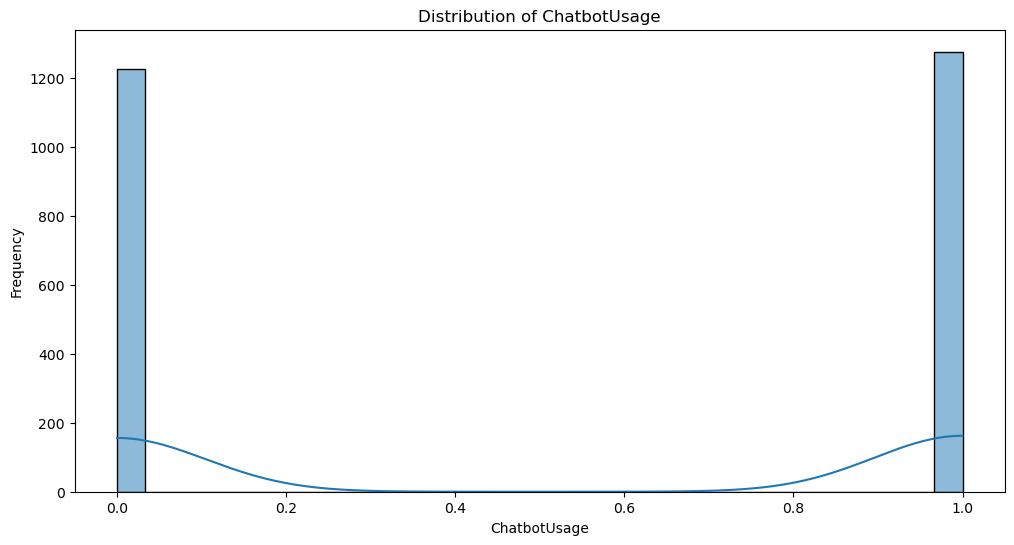

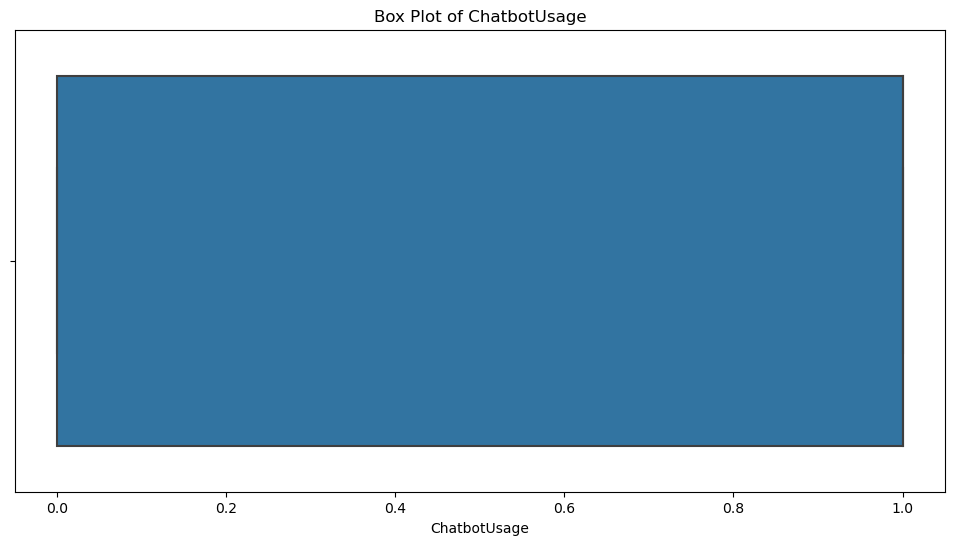

Outliers for ChatbotUsage using Z-score method: []
Outliers for ChatbotUsage using IQR method: []
------------------------------------------------
Feature: ActiveUsers
count    2500.000000
mean      550.260800
std       262.278098
min       100.000000
25%       322.750000
50%       549.500000
75%       780.250000
max      1000.000000
Name: ActiveUsers, dtype: float64


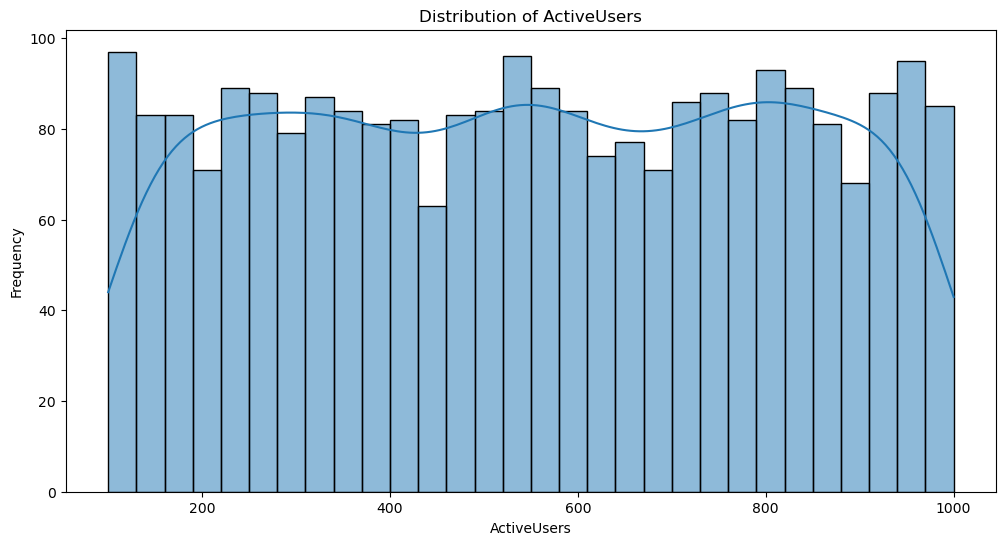

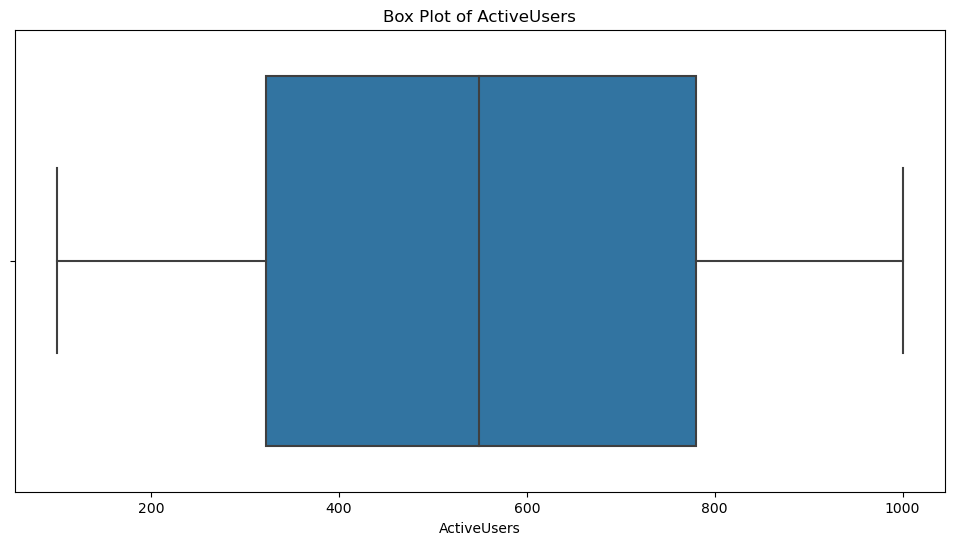

Outliers for ActiveUsers using Z-score method: []
Outliers for ActiveUsers using IQR method: []
------------------------------------------------
Feature: DailyNewUsers
count    2500.000000
mean        5.023200
std         3.179104
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: DailyNewUsers, dtype: float64


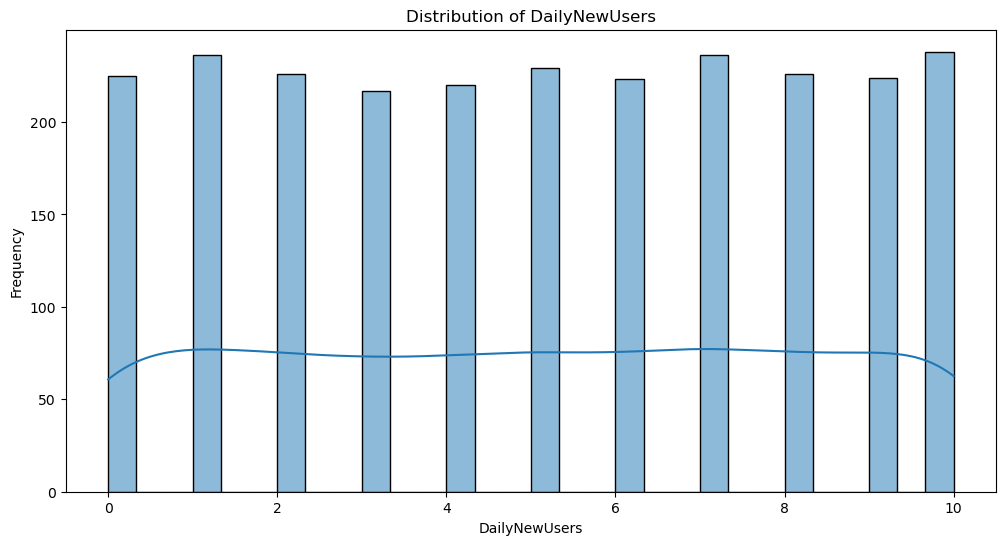

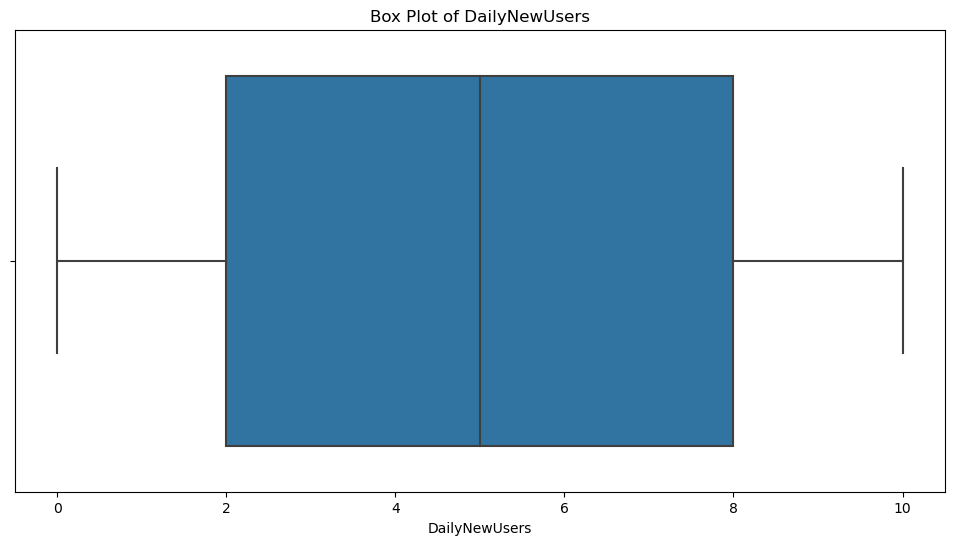

Outliers for DailyNewUsers using Z-score method: []
Outliers for DailyNewUsers using IQR method: []
------------------------------------------------
Feature: AverageSessionLength
count    2500.000000
mean        1.755567
std         0.724544
min         0.500438
25%         1.128996
50%         1.749264
75%         2.393212
max         2.999931
Name: AverageSessionLength, dtype: float64


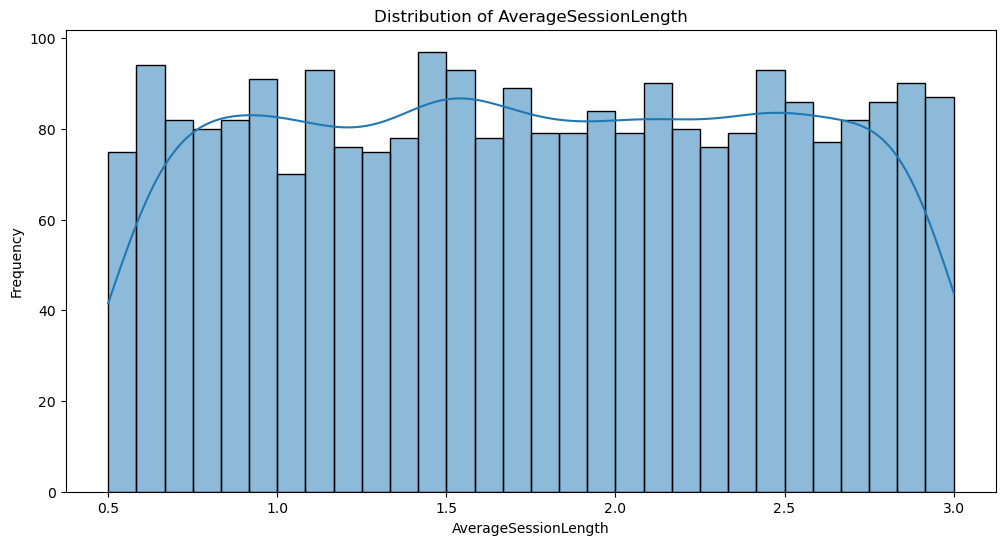

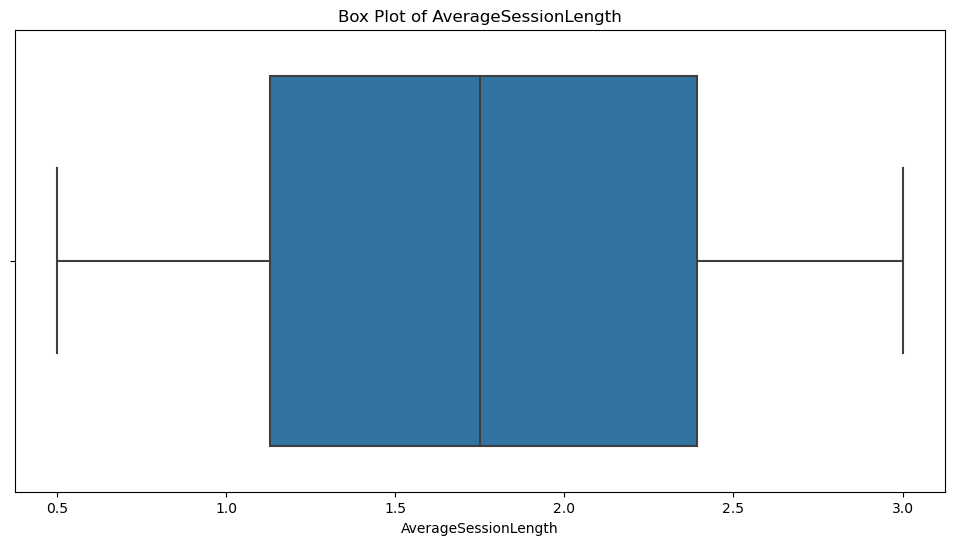

Outliers for AverageSessionLength using Z-score method: []
Outliers for AverageSessionLength using IQR method: []
------------------------------------------------
Feature: MonthlyRevenue
count     2500.000000
mean     50634.222154
std      28666.080127
min       1010.206194
25%      25676.611790
50%      50964.990105
75%      75797.050717
max      99941.170635
Name: MonthlyRevenue, dtype: float64


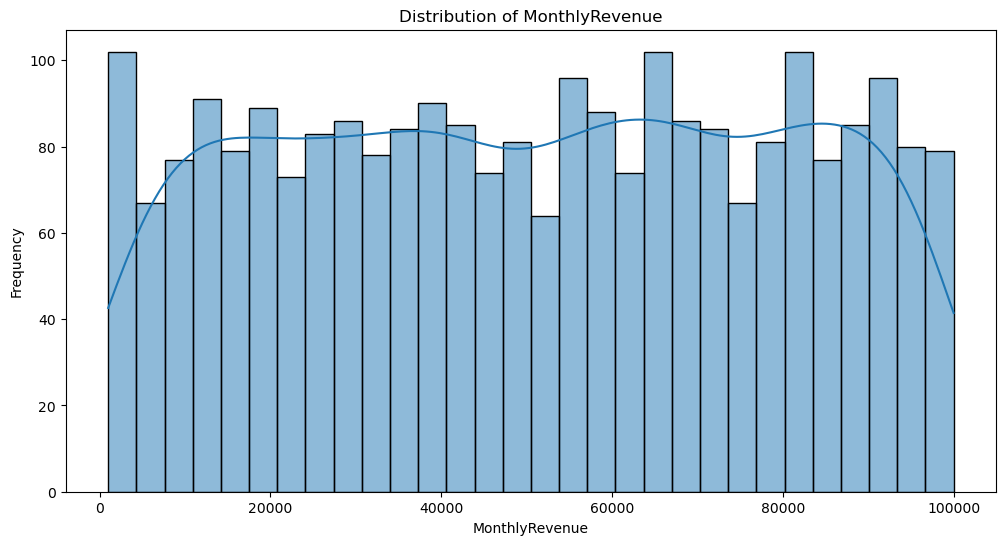

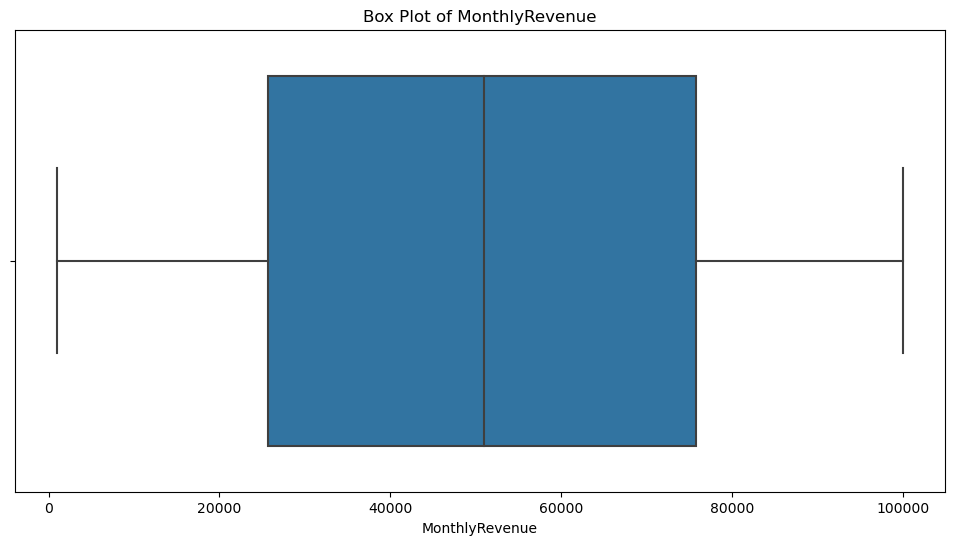

Outliers for MonthlyRevenue using Z-score method: []
Outliers for MonthlyRevenue using IQR method: []
------------------------------------------------
Feature: IsFraud
count    2500.000000
mean        0.502800
std         0.500092
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: IsFraud, dtype: float64


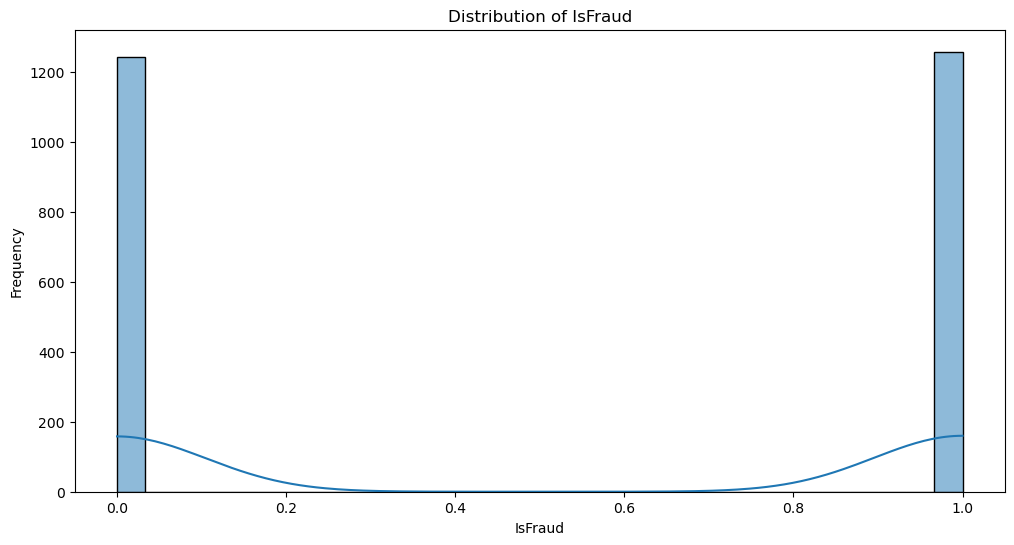

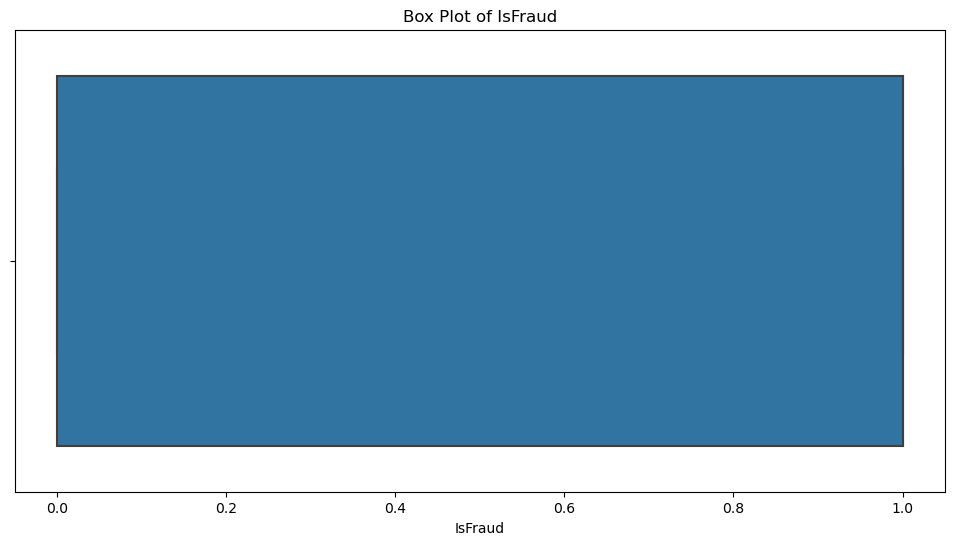

Outliers for IsFraud using Z-score method: []
Outliers for IsFraud using IQR method: []
------------------------------------------------
Feature: AnomalyCount
count    2500.000000
mean        0.546800
std         0.709938
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: AnomalyCount, dtype: float64


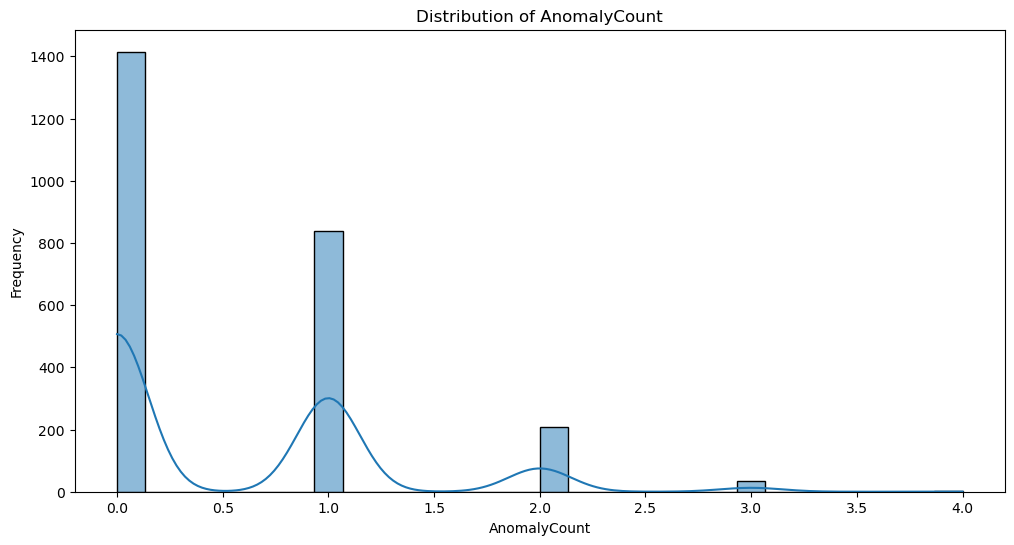

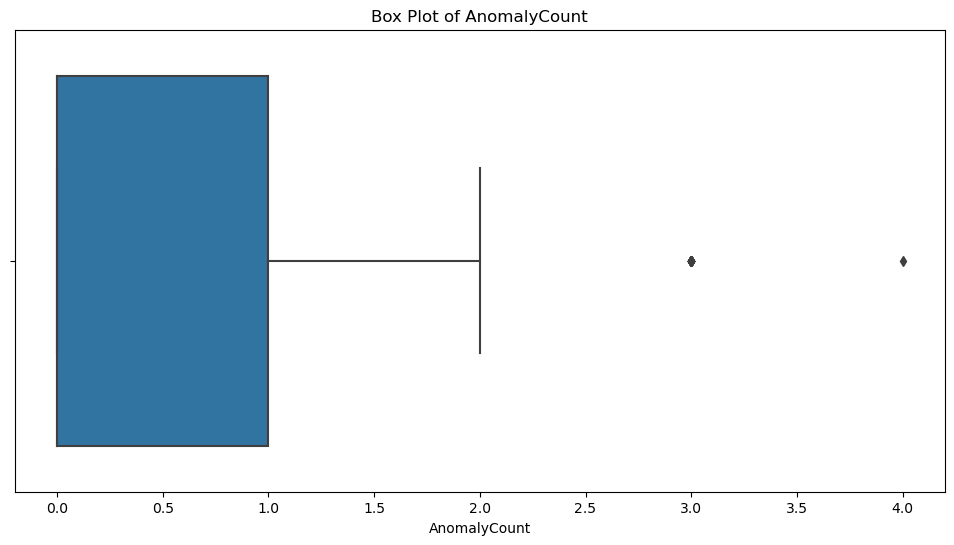

Outliers for AnomalyCount using Z-score method: [2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 2 3 3 3 2 2
 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2
 3 3 2 2 2 2 2 2 2 3 2 2 2 3 3 2 2 2 2 2 2 2 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2
 2 2 2 3 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 3 2 2 2 2 2 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2]
Outliers for AnomalyCount using IQR method: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4]
------------------------------------------------
Feature: DetectedAsFraud
count    2500.000000
mean        0.434000
std         0.495724
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: DetectedAsFraud, dtype: float64


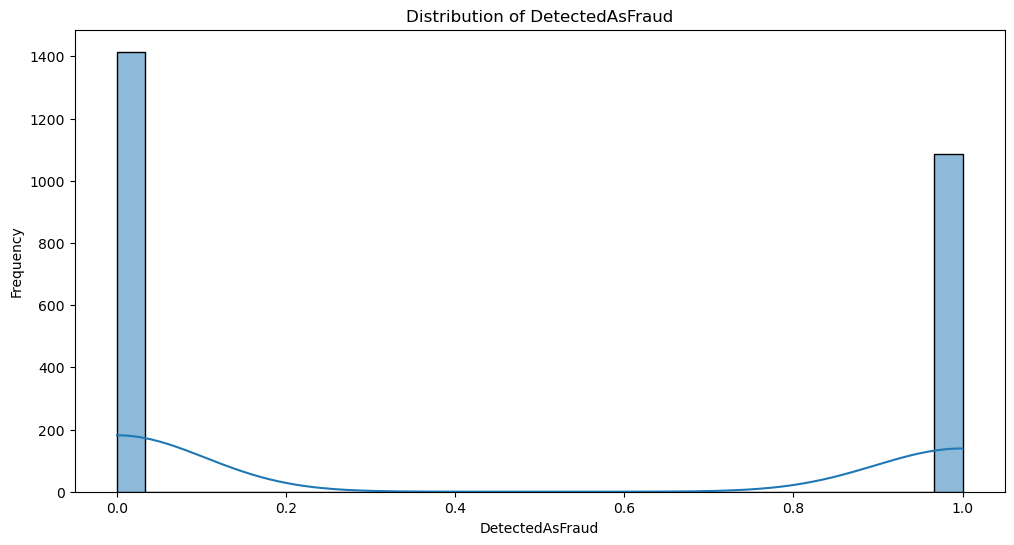

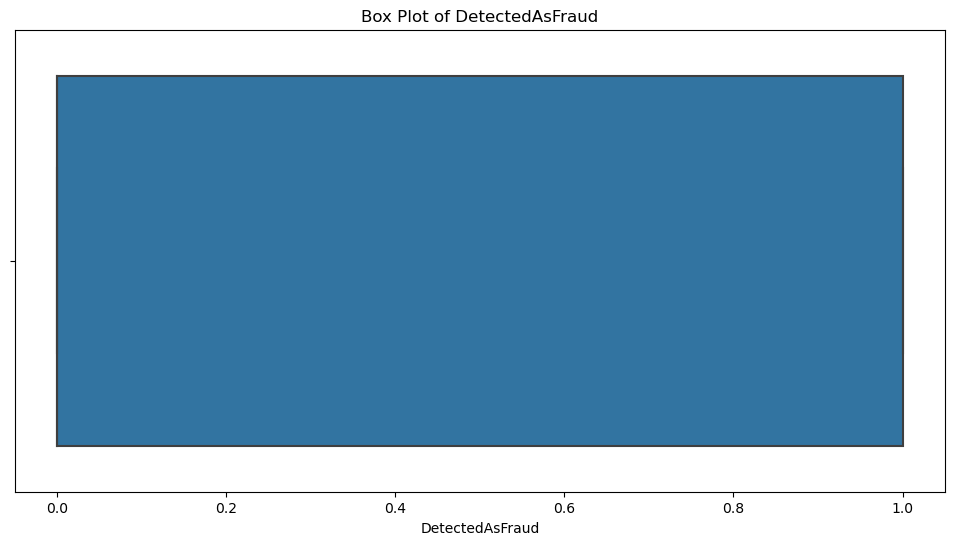

Outliers for DetectedAsFraud using Z-score method: []
Outliers for DetectedAsFraud using IQR method: []
------------------------------------------------


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loop through each numerical column
for col in df.select_dtypes(include=[np.number]).columns:
    
    # Descriptive Statistics
    print(f"Feature: {col}")
    print(df[col].describe())
    
    # Histogram and Density Plot
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()
    
    # Outliers Detection using Z-Scores
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    outliers = (abs_z_scores > 2)  # Adjust threshold as needed
    print(f"Outliers for {col} using Z-score method:", df[col][outliers].values)
    
    # Outliers Detection using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    print(f"Outliers for {col} using IQR method:", df[col][outliers].values)
    
    print("------------------------------------------------")


# EDA for all categorical features

Feature: Gender
Other     858
Female    836
Male      806
Name: Gender, dtype: int64


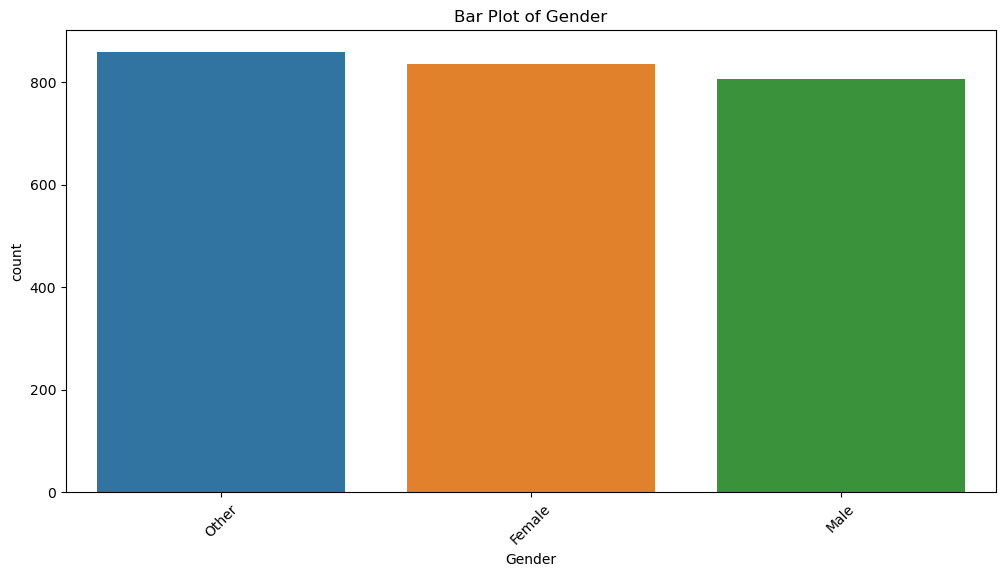

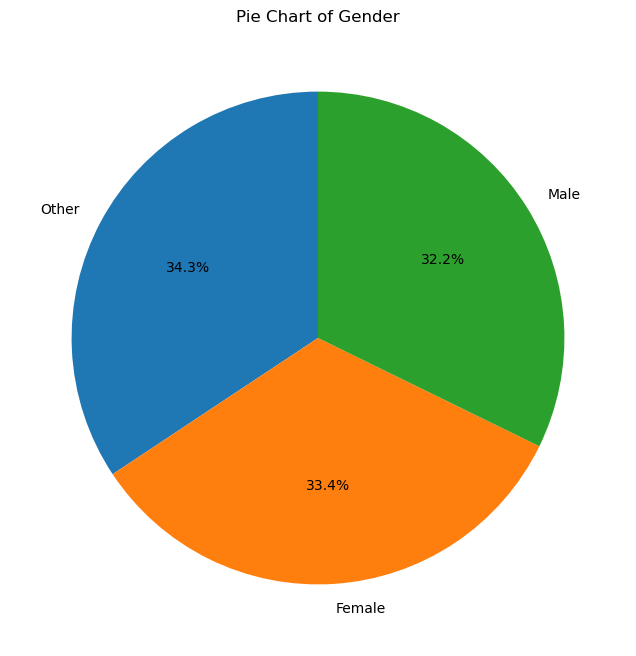

------------------------------------------------
Feature: Location
Rural       837
Urban       835
Suburban    828
Name: Location, dtype: int64


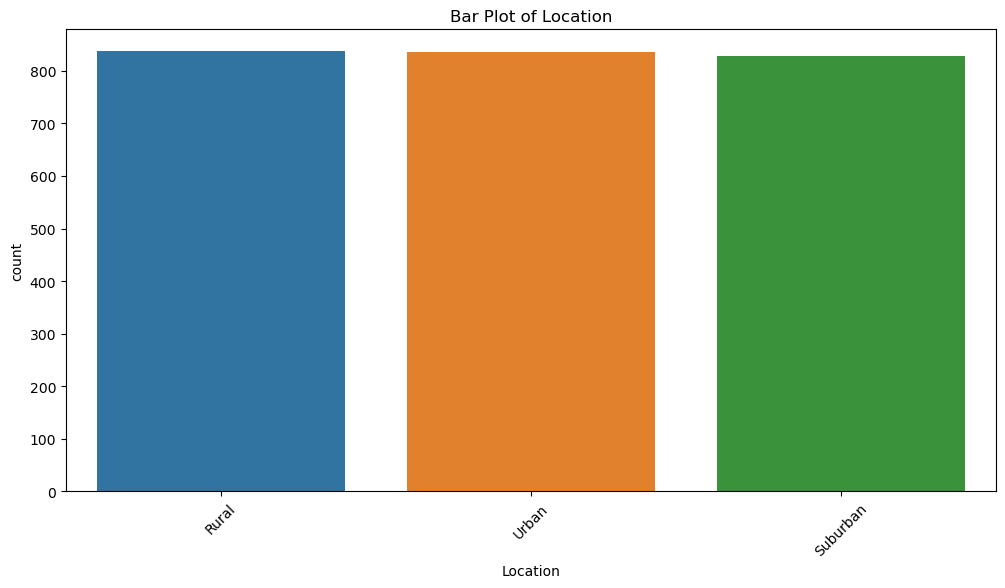

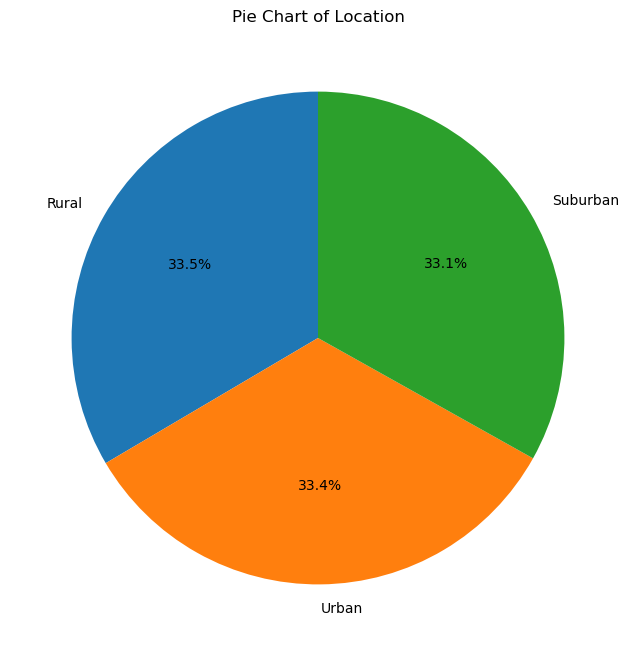

------------------------------------------------
Feature: Marital_Status
Single      854
Divorced    832
Married     814
Name: Marital_Status, dtype: int64


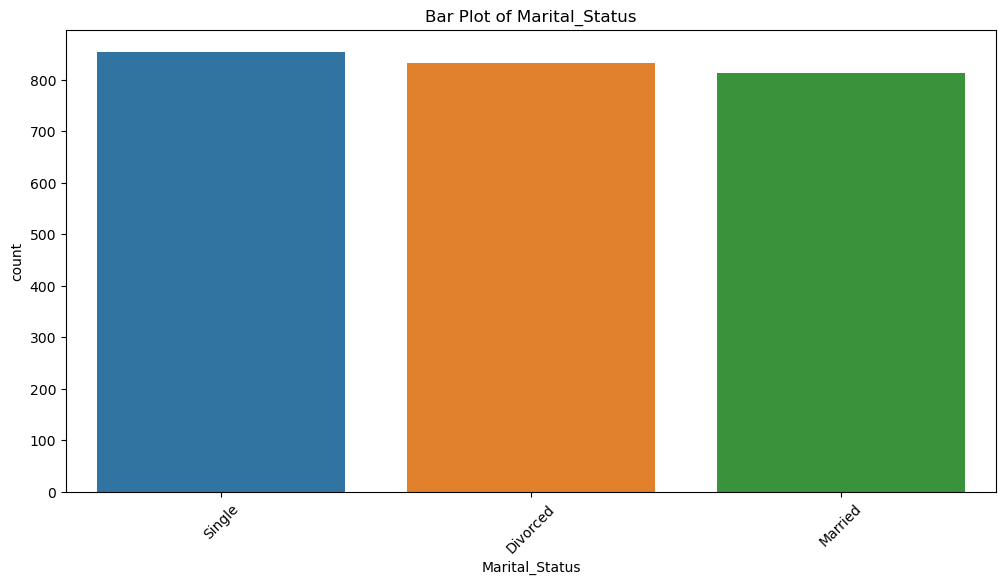

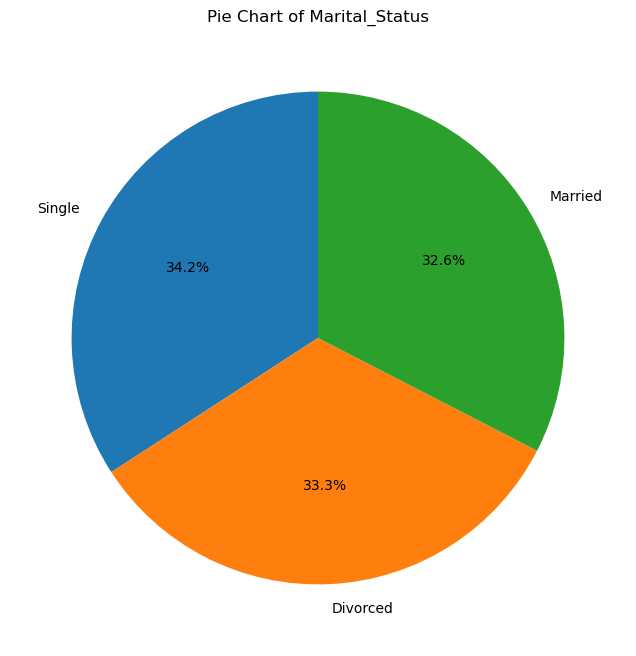

------------------------------------------------
Feature: Employment
Self-Employed    845
Employed         843
Unemployed       812
Name: Employment, dtype: int64


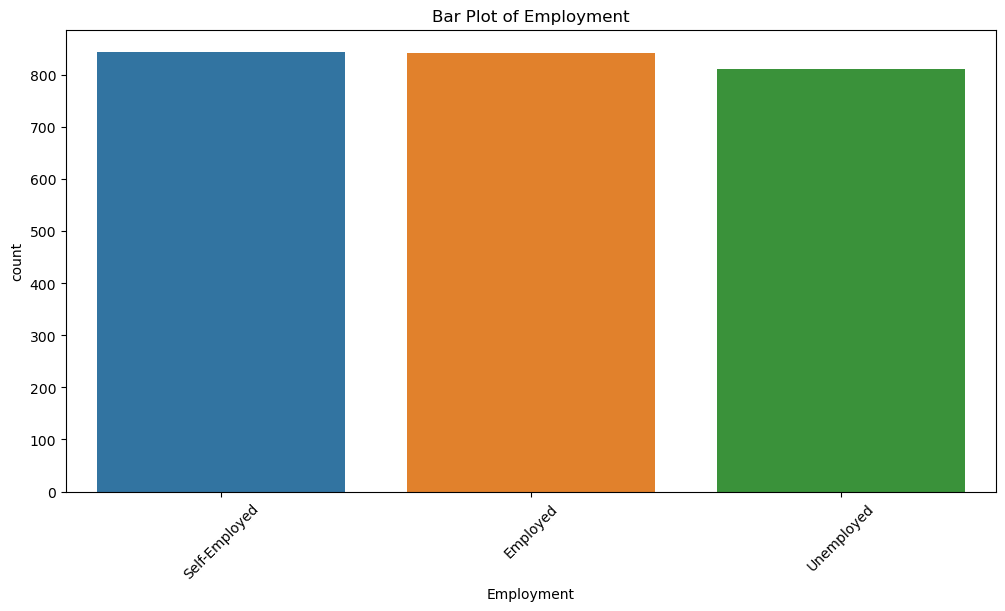

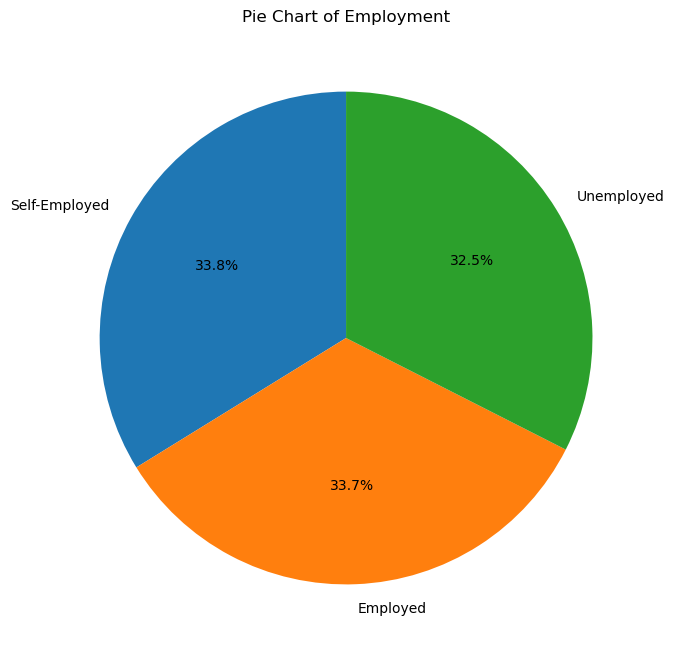

------------------------------------------------
Feature: DeviceType
Mobile     874
Tablet     835
Desktop    791
Name: DeviceType, dtype: int64


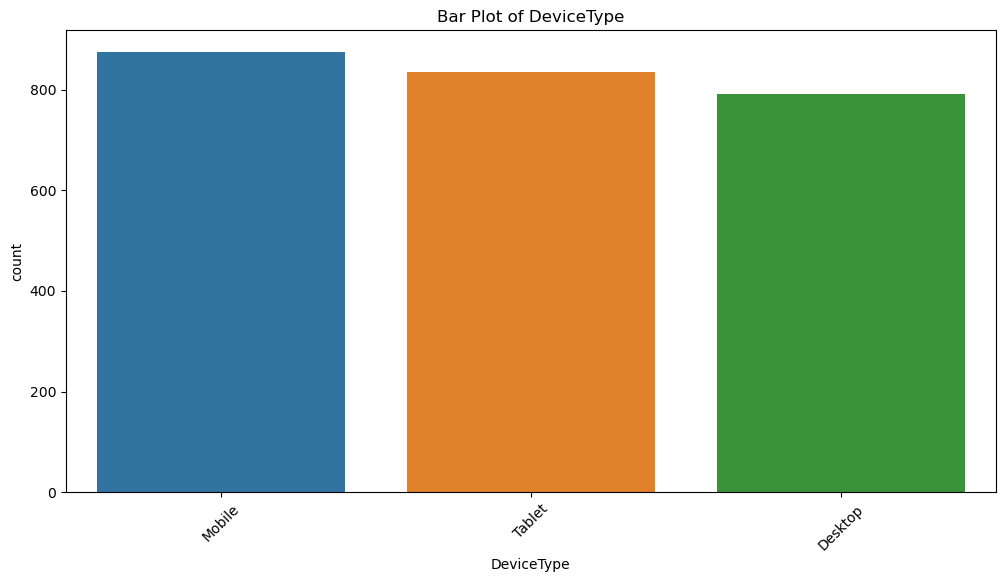

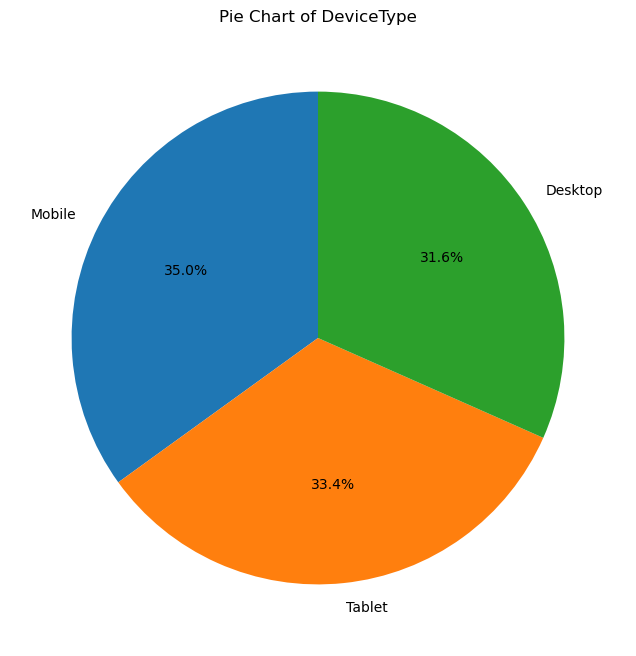

------------------------------------------------
Feature: Browser
Safari     643
Edge       635
Chrome     623
Firefox    599
Name: Browser, dtype: int64


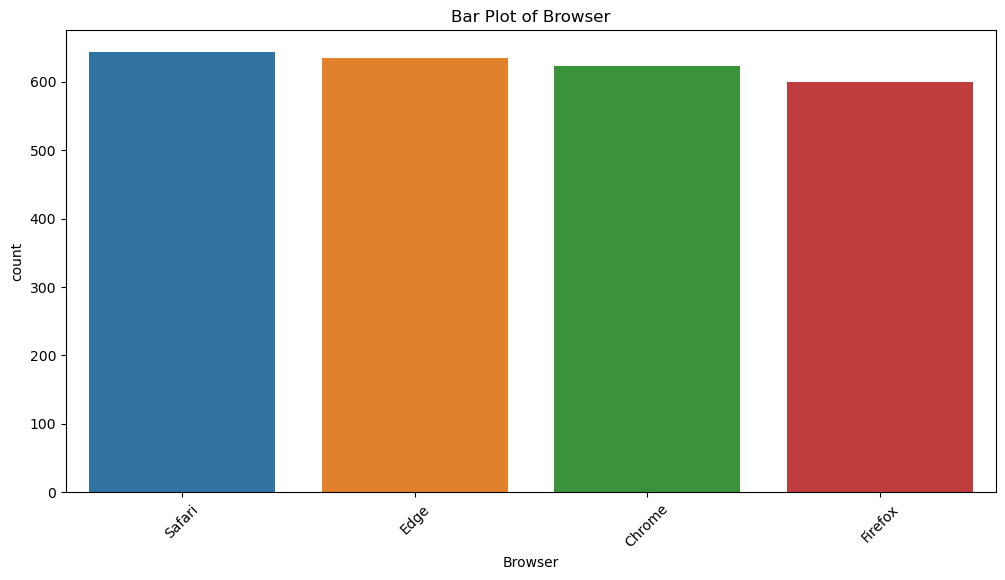

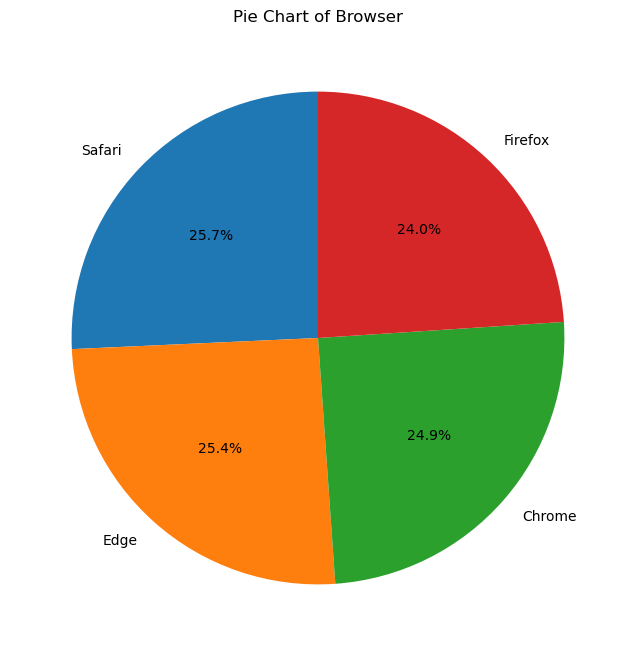

------------------------------------------------


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each categorical column
for col in df.select_dtypes(include=['object']).columns:
    
    # Frequency Table
    print(f"Feature: {col}")
    print(df[col].value_counts())
    
    # Bar Plot
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()
    
    # Pie Chart
    plt.figure(figsize=(8, 8))
    df[col].value_counts().plot.pie(autopct='%.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # hide the y-axis label
    plt.show()
    
    print("------------------------------------------------")


In [9]:
# Select features you want to include in the Z-score calculation
features_to_check = ['Age', 'SavingsAmount', 'AvgTransactionValue', 
                     'TransactionCountLast30Days', 'AvgTransactionPerMonth', 
                     'AvgTransactionAmount', 'AppUsageTime', 'AppUsageDuration']

# Compute Z-scores
df_zscore = df[features_to_check].apply(stats.zscore)

# Define a threshold (usually a Z-score of 2 or greater is considered an anomaly)
threshold = 1.5

# Get boolean DataFrame indicating presence of anomalies
anomalies_df = df_zscore > threshold

# Adding a new column to store the count of anomalies for each row
anomalies_count = anomalies_df.sum(axis=1)

# Adding the anomaly count as a new column in the original DataFrame
df['AnomalyCount'] = anomalies_count

# Label as fraudulent if any of the features crosses the threshold
df['DetectedAsFraud'] = (df['AnomalyCount'] > 0).astype(int)

# See how many we detected as fraud compared to actual frauds
print("Detected as Fraud: ", df['DetectedAsFraud'].sum())
print("Actual Fraud: ", df['IsFraud'].sum())

# Your evaluation metrics code here to see how well we did (precision, recall, etc.)


Detected as Fraud:  1085
Actual Fraud:  1257
